# Fisher's IRIS Dataset


## Background

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
SepalLength

sepal_length

sepal_width

petal_length

petal_width

class

## Hypothesis 
###  Null 
### Alternative
### P-Value < 0.05)

## Import Libraries

In [95]:
#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizuaization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier


## Get Data

In [101]:
iris_dataset = pd.read_csv("C:\\Users\\jagan\\OneDrive\\Documents\\Machine Learning - Projects\\Iris\iris_dataset.csv")

#### Next step  - We will get the columns attributes

In [102]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Understanding the variable category
#### Numerical Variables:
sepal_length

sepal_width

petal_length

petal_width

#### Categorical Variables:
class  (This is the species - Iris-setosa,Iris-virginica and Iris-versicolor)

## Performing Descriptive Statistics

### Taking First Peek into the data

In [109]:
iris_dataset.shape  # This is prvide the no of rows and columns

(150, 5)

In [110]:
iris_dataset.head(10) # Fetching top 10 rows

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Variable Identification
Based on the input/predictor variable , we have to classify the species.

#### Input or Predictor Variables:

sepal_length

sepal_width

petal_length

petal_width

#### Target Variables:

class (This is the species - Iris-setosa,Iris-virginica and Iris-versicolor)

## Univariate Analysis
### For the Numeric Variables - we will find out the central tendency (mean, median,mode,max,min and count) and dispersion(Interquartile range & standard deviation)

In [111]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Inference:
1. In Total, we have 150 records and all have columns have values filled. No data missing.
2. Sepal Length& Sepal Width maximum length & width can vary almost twice.
3. petal_length max is almost 7 times

### For Categorical Variables - we will find out the frequency distribution

In [27]:
iris_dataset.describe(include=['O']) # This provides the details of the categorical variables

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [112]:
# Frequency Distribution
iris_dataset['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

Inference:
1. In Total, we have 150 records.
2. We have 3 different kind of categorical varibles (Iris-setosa,Iris-virginica and Iris-versicolor)
3. Fequency is 50 rows for each kind

###  Analyzing the Kernel Density Estimation  - of Sepal / Petal Length/Width using Violin Plot

Violin Plot shows the distribution of length & width across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

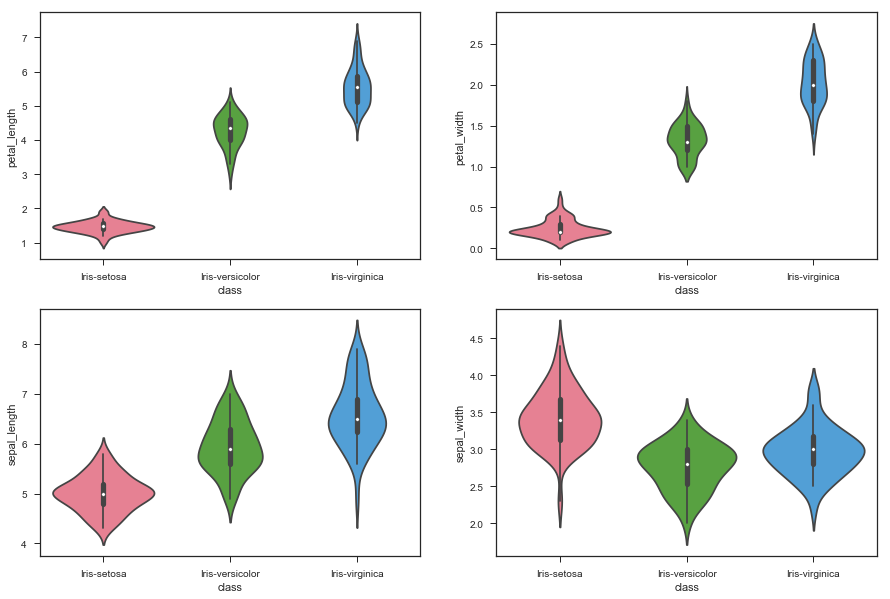

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal_length',data=iris_dataset,palette='husl')
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal_width',data=iris_dataset,palette='husl')
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal_length',data=iris_dataset,palette='husl')
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal_width',data=iris_dataset,palette='husl')

## Bi-Variate Analysis by vizualizing the data

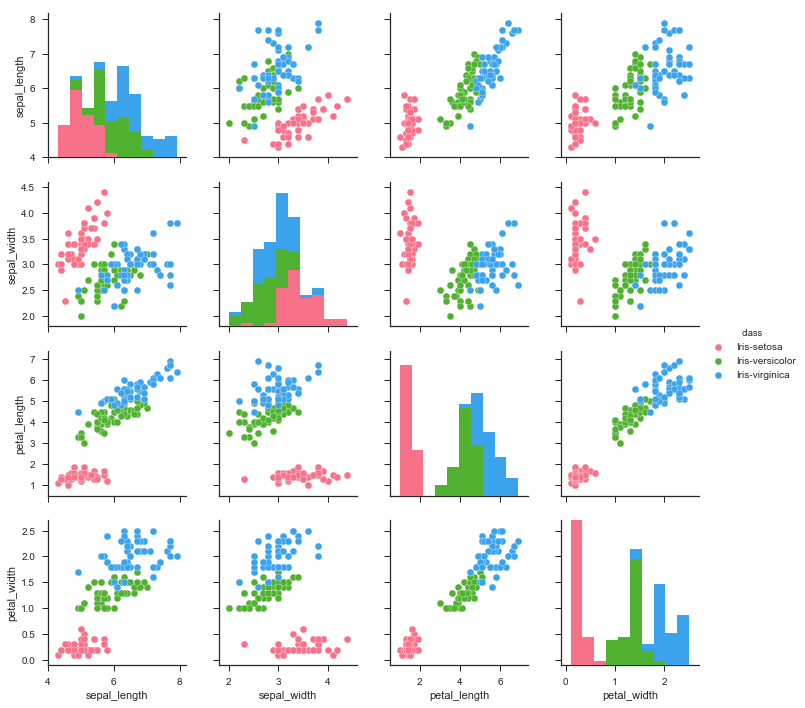

In [46]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris_dataset,hue='class',palette='husl')

Bivariate Analysis  - 
1. Sepal Length & Sepal Width (Row 1, Fig 2 ) : Setosa can be seperated easily but Versicolor & Virginica sepal length/width is mixed and cannot be seperated
2. Petal length & Petal width (Row 3, Fig 4 ) :  Setosa can be seperated easily. Majority of Versicolor & Virginica can be separted as well with some errors in decision boundary.
3. Sepal Length & Petal length  (Row 1, Fig 3 ) :  Setosa can be seperated easily. Majority of Versicolor & Virginica can be separted as well with some errors in decision boundary.
3. Sepal width & Petal Width  (Row 2, Fig 4 ) :  Setosa can be seperated easily. Majority of Versicolor & Virginica can be separted as well with some errors in decision boundary.  
    

## Computing pairwise correlation of columns

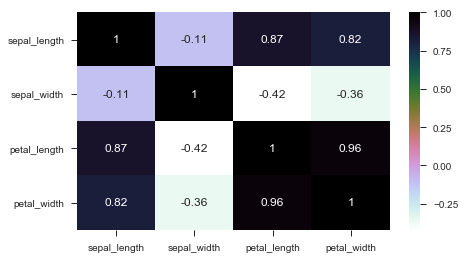

In [77]:
#iris_dataset.corr(method='pearson')
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Inference :
1. petal_length & petal_width shows strongest positive co-relation (0.96)
2. sepal_length & width_width are not co-related
3. sepal_length & petal_length shows strong positive co-relation (0.87)
4. sepal_length & petal_width shows strong positive co-relation (0.81)

## Machine Learning Classification Begins Here

### We will encode the categorical variable column "class" to convert Setosa, Vericolor and Verginica into numerical data (0,1 and 2)

In [113]:
iris_dataset['species'] = iris_dataset['class']  #Taking a backup of column "class" into a new column "iris_species"

In [115]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
species         150 non-null object
dtypes: float64(4), object(2)
memory usage: 7.1+ KB


### Now converting the species into numerical variables

In [128]:
labelencoder_species = LabelEncoder()
labelencoder_X=LabelEncoder()
iris_dataset['class'] = labelencoder_species.fit_transform(iris_dataset['class'])

In [134]:
iris_dataset[['class','species']].head(5) # Iris-Setosa - 0 ; Iris-virsicolor - 1 ; Iris-virginica - 2;

,class,species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa


In [127]:
iris_dataset[['class','species']].tail(5) # Iris-Setosa - 0 ; Iris-virsicolor - 1 ; Iris-virginica - 2;

,class,species
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica
149,2,Iris-virginica


In [129]:
### Diving the dataset into test & train

In [135]:
X = iris_dataset.iloc[:,0:4].values
y = iris_dataset.iloc[:,4:4].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)